# Masa salarial de los sectores económicos reportados por la tesorería

En esta libreta se obtiene la masa salarial de los trabajadores registrados en el IMSS de cada sector económico reportado por la tesorería. Para esto, se utiliza el diccionario `cw_tesoreria_imss` ubicado en el archivo `crosswalk_tesoreria_imss.py`. Cada sector de la tesorería se relaciona con un conjunto de sectores económicos del IMSS, y este diccionario dicta esta relación. La masa salarial de los trabajadores, las compensaciones y los salarios de trabajadores informales de cada sector económico del IMSS, estan alamacenadas en el archivo `Masa_Sal_Sec_2_Compensaciones_Informales.csv`. A este dataframe se le anexa estas masas salariales de los sectores de la tesorería. Por ejemplo `masa_sal_ta_tesoreria_35_tasa_mensual` tiene la información de la tasa de la masa salarial de todos los trabajadores perteneceintes al sector econeomico `35` de la tesorería.

In [5]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Leer datos de masa salarial
df_fecha_ms_sec2=pd.read_csv('../IMSS_CDMX_Masa_Salarial/Masa_Sal_Sec_2_Compensaciones_Informales.csv')
# df_fecha_ms_sec2

# Sector economico 2 de diccionario de datos

df_sec2=pd.read_excel('../row_data/diccionario_de_datos_1.xlsx',sheet_name='sector 2',skiprows=[0])

# Hacer arreglo de nombre de masa_sal y sector econ. 2
sec2=df_sec2['sector_economico_2_2pos'].values

#importar diccionarios con crosswalk

from crosswalk_tesoreria_imss import cw_tesoreria_imss
cw_tesoreria_imss

{'1_2': ['61', '62', '63', '64', '65', '66', '67', '68', '69'],
 '4': ['84'],
 '5': ['83', '85'],
 '6': ['91', '92', '93'],
 '7': ['81', '82'],
 '8': ['41'],
 '9': ['38'],
 '10': ['76'],
 '11': ['94'],
 '12': ['23', '24', '25'],
 '13': ['71', '72', '73', '74', '75'],
 '14': ['87'],
 '15': ['88'],
 '16': ['86'],
 '17': ['28', '29'],
 '18': ['83', '85'],
 '19': ['20', '21', '22'],
 '20': ['39'],
 '21': ['74', '75', '82', '83'],
 '22': ['30', '31', '32'],
 '23': ['26', '27'],
 '24': ['50'],
 '25': ['51'],
 '26': ['1', '2', '5'],
 '27': ['34'],
 '28': ['35', '36'],
 '29': ['11', '31'],
 '30': ['12', '31'],
 '31': ['5'],
 '32': ['33'],
 '33': ['13'],
 '34': ['11'],
 '35': ['99'],
 '36': ['3']}

In [6]:
df_fecha_ms_sec2

,Unnamed: 0.1,Unnamed: 0,Fecha,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc,masa_sal_ta_1,masa_sal_ta_2,...,masa_sal_tpc_93_tasa_mensual_frac_informales,masa_sal_tpc_94_frac_informales,masa_sal_tpc_94_total_mensual_frac_informales,masa_sal_tpc_94_tasa_mensual_frac_informales,masa_sal_tpc_99_frac_informales,masa_sal_tpc_99_total_mensual_frac_informales,masa_sal_tpc_99_tasa_mensual_frac_informales,masa_sal_tpc_total_con_informales,masa_sal_tpc_total_mensual_con_informales,masa_sal_tpc_tasa_mensual_con_informales
0,0,0,2010-01,7.957087e+08,6.227404e+07,0.00,7.334346e+08,0.00,165869.83,218018.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,1,1,2010-02,7.992903e+08,6.321622e+07,0.00,7.360740e+08,0.00,171166.49,254836.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2,2,2010-03,7.940649e+08,6.520014e+07,0.00,7.288647e+08,0.00,169638.70,258697.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,3,3,2010-04,7.974165e+08,6.562731e+07,0.00,7.317892e+08,0.00,172838.26,272625.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,4,4,2010-05,8.107744e+08,6.721569e+07,0.00,7.435587e+08,0.00,173027.61,295062.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,155,2022-12,2.091462e+09,2.001122e+08,200.00,1.891344e+09,5426.29,967811.51,2152676.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1778.712040,55140.073255,1654.202198
156,156,156,2023-01,2.212190e+09,2.113986e+08,217.67,2.000785e+09,6240.29,913801.14,1971717.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2045.537367,63411.658377,1902.349751
157,157,157,2023-02,2.253414e+09,2.177692e+08,217.67,2.035638e+09,6240.29,906440.72,1962962.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2045.537367,57275.046276,1718.251388
158,158,158,2023-03,2.276352e+09,2.247246e+08,217.67,2.051620e+09,7486.57,874848.66,2013708.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2454.062020,76075.922634,2282.277679


In [7]:
masa_sal_col=['masa_sal_ta', 'masa_sal_teu', 'masa_sal_tec', 'masa_sal_tpu', 'masa_sal_tpc']

for ms in masa_sal_col:

    for sec_t in cw_tesoreria_imss.keys():

        df_fecha_ms_sec2[ms+'_tesoreria_'+str(sec_t)+'_tasa_mensual_con_compensaciones']=df_fecha_ms_sec2.apply(lambda row:
                                        sum([row[ms+'_'+sec+'_tasa_mensual_con_compensaciones'] for sec in cw_tesoreria_imss[sec_t]]),axis=1)

        df_fecha_ms_sec2[ms+'_tesoreria_'+str(sec_t)+'_tasa_mensual_frac_informales']=df_fecha_ms_sec2.apply(lambda row:
                                        sum([row[ms+'_'+sec+'_tasa_mensual_frac_informales'] for sec in cw_tesoreria_imss[sec_t]]),axis=1)

        df_fecha_ms_sec2[ms+'_tesoreria_'+str(sec_t)+'_tasa_mensual']=df_fecha_ms_sec2.apply(lambda row:
                                        sum([row[ms+'_'+sec+'_tasa_mensual'] for sec in cw_tesoreria_imss[sec_t]]),axis=1)


    
df_fecha_ms_sec2


,Unnamed: 0.1,Unnamed: 0,Fecha,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc,masa_sal_ta_1,masa_sal_ta_2,...,masa_sal_tpc_tesoreria_33_tasa_mensual,masa_sal_tpc_tesoreria_34_tasa_mensual_con_compensaciones,masa_sal_tpc_tesoreria_34_tasa_mensual_frac_informales,masa_sal_tpc_tesoreria_34_tasa_mensual,masa_sal_tpc_tesoreria_35_tasa_mensual_con_compensaciones,masa_sal_tpc_tesoreria_35_tasa_mensual_frac_informales,masa_sal_tpc_tesoreria_35_tasa_mensual,masa_sal_tpc_tesoreria_36_tasa_mensual_con_compensaciones,masa_sal_tpc_tesoreria_36_tasa_mensual_frac_informales,masa_sal_tpc_tesoreria_36_tasa_mensual
0,0,0,2010-01,7.957087e+08,6.227404e+07,0.00,7.334346e+08,0.00,165869.83,218018.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2010-02,7.992903e+08,6.321622e+07,0.00,7.360740e+08,0.00,171166.49,254836.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,2010-03,7.940649e+08,6.520014e+07,0.00,7.288647e+08,0.00,169638.70,258697.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,2010-04,7.974165e+08,6.562731e+07,0.00,7.317892e+08,0.00,172838.26,272625.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,2010-05,8.107744e+08,6.721569e+07,0.00,7.435587e+08,0.00,173027.61,295062.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,155,2022-12,2.091462e+09,2.001122e+08,200.00,1.891344e+09,5426.29,967811.51,2152676.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,156,156,2023-01,2.212190e+09,2.113986e+08,217.67,2.000785e+09,6240.29,913801.14,1971717.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,157,157,2023-02,2.253414e+09,2.177692e+08,217.67,2.035638e+09,6240.29,906440.72,1962962.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,158,158,2023-03,2.276352e+09,2.247246e+08,217.67,2.051620e+09,7486.57,874848.66,2013708.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_fecha_ms_sec2.to_csv('../IMSS_CDMX_Masa_Salarial/Masa_Sal_Sectores_tesoreria_mensual.csv')

# Información aual

In [9]:
años=list(range(2010,2024))

df_masa_sal_anual=pd.DataFrame(años,columns=['Año'])

# Calcular masa salarial anual total

for ms in masa_sal_col:

    df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms+'_total_mensual'].sum().reset_index(),on='Año')

# Renombrar la columna de impuestos sumados
    df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms+'_total_mensual': ms+'_total_anual'})

    for s2 in sec2:
        ms_s2=ms+'_'+str(s2)
        
        df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms_s2+'_total_mensual'].sum().reset_index(),on='Año')
        # Renombrar la columna de impuestos sumados

        df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms_s2+'_total_mensual': ms_s2+'_total_anual'})
        
# Calcular tasa anual total

for ms in masa_sal_col:

    df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms+'_tasa_mensual'].sum().reset_index(),on='Año')

# Renombrar la columna de impuestos sumados
    df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms+'_tasa_mensual': ms+'_tasa_anual'})

    for s2 in sec2:
        ms_s2=ms+'_'+str(s2)
        
        df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms_s2+'_tasa_mensual'].sum().reset_index(),on='Año')
        # Renombrar la columna de impuestos sumados

        df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms_s2+'_tasa_mensual': ms_s2+'_tasa_anual'})
        
        
# Calcular _total_anual_con_compensaciones

for ms in masa_sal_col:

    df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms+'_total_mensual_con_compensaciones'].sum().reset_index(),on='Año')

# Renombrar la columna de impuestos sumados
    df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms+'_total_mensual_con_compensaciones': ms+'_total_anual_con_compensaciones'})

    for s2 in sec2:
        ms_s2=ms+'_'+str(s2)
        
        df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms_s2+'_total_mensual_con_compensaciones'].sum().reset_index(),on='Año')
        # Renombrar la columna de impuestos sumados

        df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms_s2+'_total_mensual_con_compensaciones': ms_s2+'_total_anual_con_compensaciones'})

        
# Calcular _tasa_anual_con_compensaciones

for ms in masa_sal_col:

    df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms+'_tasa_mensual_con_compensaciones'].sum().reset_index(),on='Año')

# Renombrar la columna de impuestos sumados
    df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms+'_tasa_mensual_con_compensaciones': ms+'_tasa_anual_con_compensaciones'})

    for s2 in sec2:
        ms_s2=ms+'_'+str(s2)
        
        df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms_s2+'_tasa_mensual_con_compensaciones'].sum().reset_index(),on='Año')
        # Renombrar la columna de impuestos sumados

        df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms_s2+'_tasa_mensual_con_compensaciones': ms_s2+'_tasa_anual_con_compensaciones'})

# Calcular _total_anual_con_informales

for ms in masa_sal_col:

    df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms+'_total_mensual_con_informales'].sum().reset_index(),on='Año')

# Renombrar la columna de impuestos sumados
    df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms+'_total_mensual_con_informales': ms+'_total_anual_con_informales'})

    for s2 in sec2:
        ms_s2=ms+'_'+str(s2)
        
        df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms_s2+'_total_mensual_frac_informales'].sum().reset_index(),on='Año')
        # Renombrar la columna de impuestos sumados

        df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms_s2+'_total_mensual_frac_informales': ms_s2+'_total_anual_frac_informales'})

        
# Calcular _tasa_anual_con_informales

for ms in masa_sal_col:

    df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms+'_tasa_mensual_con_informales'].sum().reset_index(),on='Año')

# Renombrar la columna de impuestos sumados
    df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms+'_tasa_mensual_con_informales': ms+'_tasa_anual_con_informales'})

    for s2 in sec2:
        ms_s2=ms+'_'+str(s2)
        
        df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms_s2+'_tasa_mensual_frac_informales'].sum().reset_index(),on='Año')
        # Renombrar la columna de impuestos sumados

        df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms_s2+'_tasa_mensual_frac_informales': ms_s2+'_tasa_anual_frac_informales'})

# Calcular masa salarial de los sectores correspondientes a las actividades econ. de la tesorería
        
for ms in masa_sal_col:
    
    for sec_t in cw_tesoreria_imss.keys():
        # Compensasiones
        
        df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms+'_tesoreria_'+str(sec_t)+'_tasa_mensual_con_compensaciones'].sum().reset_index(),on='Año')
        # Renombrar la columna de impuestos sumados

        df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms+'_tesoreria_'+str(sec_t)+'_tasa_mensual_con_compensaciones': ms+'_tesoreria_'+str(sec_t)+'_tasa_anual_con_compensaciones'})
        
        #Informales
        
        df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms+'_tesoreria_'+str(sec_t)+'_tasa_mensual_frac_informales'].sum().reset_index(),on='Año')
        # Renombrar la columna de impuestos sumados

        df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms+'_tesoreria_'+str(sec_t)+'_tasa_mensual_frac_informales': ms+'_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'})
        
        # Tasa mensual total
                
        df_masa_sal_anual=df_masa_sal_anual.merge(df_fecha_ms_sec2.groupby('Año')[ms+'_tesoreria_'+str(sec_t)+'_tasa_mensual'].sum().reset_index(),on='Año')
        # Renombrar la columna de impuestos sumados

        df_masa_sal_anual = df_masa_sal_anual.rename(columns={ms+'_tesoreria_'+str(sec_t)+'_tasa_mensual': ms+'_tesoreria_'+str(sec_t)+'_tasa_anual'})
        
df_masa_sal_anual


,Año,masa_sal_ta_total_anual,masa_sal_ta_1_total_anual,masa_sal_ta_2_total_anual,masa_sal_ta_3_total_anual,masa_sal_ta_4_total_anual,masa_sal_ta_5_total_anual,masa_sal_ta_11_total_anual,masa_sal_ta_12_total_anual,masa_sal_ta_13_total_anual,...,masa_sal_tpc_tesoreria_33_tasa_anual,masa_sal_tpc_tesoreria_34_tasa_anual_con_compensaciones,masa_sal_tpc_tesoreria_34_tasa_anual_frac_informales,masa_sal_tpc_tesoreria_34_tasa_anual,masa_sal_tpc_tesoreria_35_tasa_anual_con_compensaciones,masa_sal_tpc_tesoreria_35_tasa_anual_frac_informales,masa_sal_tpc_tesoreria_35_tasa_anual,masa_sal_tpc_tesoreria_36_tasa_anual_con_compensaciones,masa_sal_tpc_tesoreria_36_tasa_anual_frac_informales,masa_sal_tpc_tesoreria_36_tasa_anual
0,2010,2.965757e+11,6.355908e+07,1.173521e+08,2074603.05,1391175.88,1471990.37,48829316.93,6.445777e+07,4.142354e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,3.248792e+11,7.459406e+07,2.489827e+08,2141874.52,1748630.54,1455064.34,42974486.75,1.661679e+08,4.647894e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012,3.546133e+11,1.385054e+08,2.738072e+08,2179507.45,2132403.00,1547821.33,45823329.31,1.628453e+08,5.540641e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013,3.817992e+11,2.194987e+08,1.617208e+08,1930371.71,2124983.81,1589588.17,45114254.85,1.720627e+08,1.048714e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014,4.123017e+11,2.501806e+08,2.693307e+08,3879217.74,3027583.09,1271883.64,37277712.60,2.176347e+08,1.373614e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2015,4.467343e+11,2.767197e+08,2.756559e+08,5849778.36,5285531.71,1209226.35,50318514.48,1.663205e+08,1.993771e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2016,4.792817e+11,2.757512e+08,4.870355e+08,4029387.28,15591786.63,1835758.58,56132292.13,2.450388e+08,1.839511e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2017,5.099659e+11,3.034881e+08,5.872026e+08,5142952.15,8233385.78,1493566.78,60434909.50,4.381635e+08,1.951427e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2018,5.523213e+11,2.858986e+08,7.041533e+08,6219977.15,4845617.26,1880497.11,79909572.15,4.579971e+08,1.895418e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2019,5.908569e+11,3.204261e+08,6.281707e+08,5752830.03,4339142.03,1414113.12,73942424.36,6.296582e+08,1.749636e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_masa_sal_anual.to_csv('../IMSS_CDMX_Masa_Salarial/Masa_Sal_Sectores_tesoreria_anual.csv')

# Inresos por sector económico obtenidos de los datos de la tesorería

Aquí se oobtienen los ingresos por sector económico d ela tesorería. Para ello, se utilizan los ingresos anuales y se multiplican por la participación por sector económico, obtenida en la libreta `Porcentajes por sector econ. nóminas y matrices de correlación.ipynb`.

In [11]:
df_ingreso_nomina_registrado=pd.read_csv('../row_data/ingresos_anuales_nomina.csv')
df_ingreso_nomina_registrado
df_porcentajes=pd.read_csv('../row_data/porcentajes_sector_nomina.csv')
df_impuestos_por_sector=df_porcentajes[df_porcentajes['Año']>2009].merge(
    df_ingreso_nomina_registrado[['Año','Nómina']],on='Año')
df_impuestos_por_sector

,Unnamed: 0,Año,1,2,3,4,5,6,7,8,...,28,29,30,31,32,33,34,35,36,Nómina
0,20,2010,0.077361,0.080290,0.249642,0.206473,0.002857,0.005753,0.002333,0.003965,...,0.001034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10838.7
1,21,2011,0.037447,0.056636,0.172520,0.420277,0.005584,0.007052,0.029723,0.028854,...,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000,0.000000,0.000000,12286.1
2,22,2012,0.017113,0.018051,0.054848,0.110180,0.001360,0.010282,0.026283,0.014414,...,0.000009,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,0.000000,0.000000,14174.0
3,23,2013,0.040623,0.035312,0.170978,0.277023,0.001502,0.010886,0.070099,0.017695,...,0.006125,0.000000,0.000000,0.000026,0.000000,0.000000,0.000000,0.000000,0.000000,14020.8
4,24,2014,0.023788,0.064168,0.068980,0.215334,0.005172,0.061768,0.126150,0.017855,...,0.001754,0.000083,0.029858,0.000240,0.000083,0.000002,0.000028,0.000043,0.000000,18196.6
5,25,2015,0.024165,0.071907,0.052276,0.237458,0.005432,0.063974,0.147294,0.014111,...,0.001718,0.000042,0.042228,0.000256,0.000094,0.000005,0.000027,0.001128,0.000233,20248.4
6,26,2016,0.025385,0.072989,0.038303,0.250267,0.005642,0.065115,0.149435,0.013895,...,0.001667,0.000027,0.034658,0.000207,0.000098,0.000005,0.000032,0.002255,0.000233,21677.7
7,27,2017,0.027914,0.076367,0.015732,0.266275,0.006215,0.065881,0.152864,0.016341,...,0.001671,0.000030,0.034085,0.000213,0.000096,0.000005,0.000033,0.002688,0.000218,22707.4
8,28,2018,0.029252,0.076696,0.002000,0.269013,0.005813,0.065491,0.158516,0.016997,...,0.001482,0.000024,0.033782,0.000227,0.000101,0.000006,0.000030,0.003030,0.000202,24817.0
9,29,2019,0.030930,0.072826,0.000002,0.281408,0.006141,0.065640,0.161998,0.017494,...,0.001550,0.000000,0.033191,0.000204,0.000105,0.000011,0.000041,0.002562,0.000179,25439.4


In [12]:
for sec in np.arange(1,37):
    
    df_impuestos_por_sector['impuesto_'+str(sec)]=df_impuestos_por_sector.apply(lambda row:
                                                row[str(sec)]*row['Nómina'],axis=1)
    
df_impuestos_por_sector



,Unnamed: 0,Año,1,2,3,4,5,6,7,8,...,impuesto_27,impuesto_28,impuesto_29,impuesto_30,impuesto_31,impuesto_32,impuesto_33,impuesto_34,impuesto_35,impuesto_36
0,20,2010,0.077361,0.080290,0.249642,0.206473,0.002857,0.005753,0.002333,0.003965,...,0.114055,11.208466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,21,2011,0.037447,0.056636,0.172520,0.420277,0.005584,0.007052,0.029723,0.028854,...,0.612542,0.000000,0.000000,0.000000,0.285442,0.000000,0.000000,0.000000,0.000000,0.000000
2,22,2012,0.017113,0.018051,0.054848,0.110180,0.001360,0.010282,0.026283,0.014414,...,0.314785,0.120605,0.000000,0.000000,0.275823,0.000000,0.000000,0.000000,0.000000,0.000000
3,23,2013,0.040623,0.035312,0.170978,0.277023,0.001502,0.010886,0.070099,0.017695,...,0.081102,85.874207,0.000000,0.000000,0.359545,0.000000,0.000000,0.000000,0.000000,0.000000
4,24,2014,0.023788,0.064168,0.068980,0.215334,0.005172,0.061768,0.126150,0.017855,...,7.671938,31.908533,1.509189,543.305076,4.372561,1.513529,0.043829,0.511822,0.782417,0.000000
5,25,2015,0.024165,0.071907,0.052276,0.237458,0.005432,0.063974,0.147294,0.014111,...,8.089720,34.784193,0.845010,855.057234,5.188162,1.913433,0.093511,0.553933,22.847056,4.719074
6,26,2016,0.025385,0.072989,0.038303,0.250267,0.005642,0.065115,0.149435,0.013895,...,10.301111,36.145799,0.593331,751.312462,4.486326,2.128818,0.099419,0.697245,48.887495,5.052040
7,27,2017,0.027914,0.076367,0.015732,0.266275,0.006215,0.065881,0.152864,0.016341,...,11.491444,37.945727,0.674501,773.975027,4.838965,2.174317,0.113397,0.758337,61.029076,4.953899
8,28,2018,0.029252,0.076696,0.002000,0.269013,0.005813,0.065491,0.158516,0.016997,...,10.179646,36.777423,0.597597,838.360296,5.622665,2.517877,0.158478,0.733325,75.200163,5.009522
9,29,2019,0.030930,0.072826,0.000002,0.281408,0.006141,0.065640,0.161998,0.017494,...,8.400697,39.423824,0.000000,844.359437,5.202143,2.673115,0.275842,1.051184,65.169236,4.560331


# Comparación con los estimados del IMSS

A continuación se muestra la comparación de los datos porvenientes del IMSS y los ingresos reportados por la tesorería por sector económico. Para cambiar el sector de interes se sólo se debe de cambiar la variable `sec_t`. Por ejemplo, `sec_t='4'` indica que el sector de la tesorería que se va a comparar es el `4`.


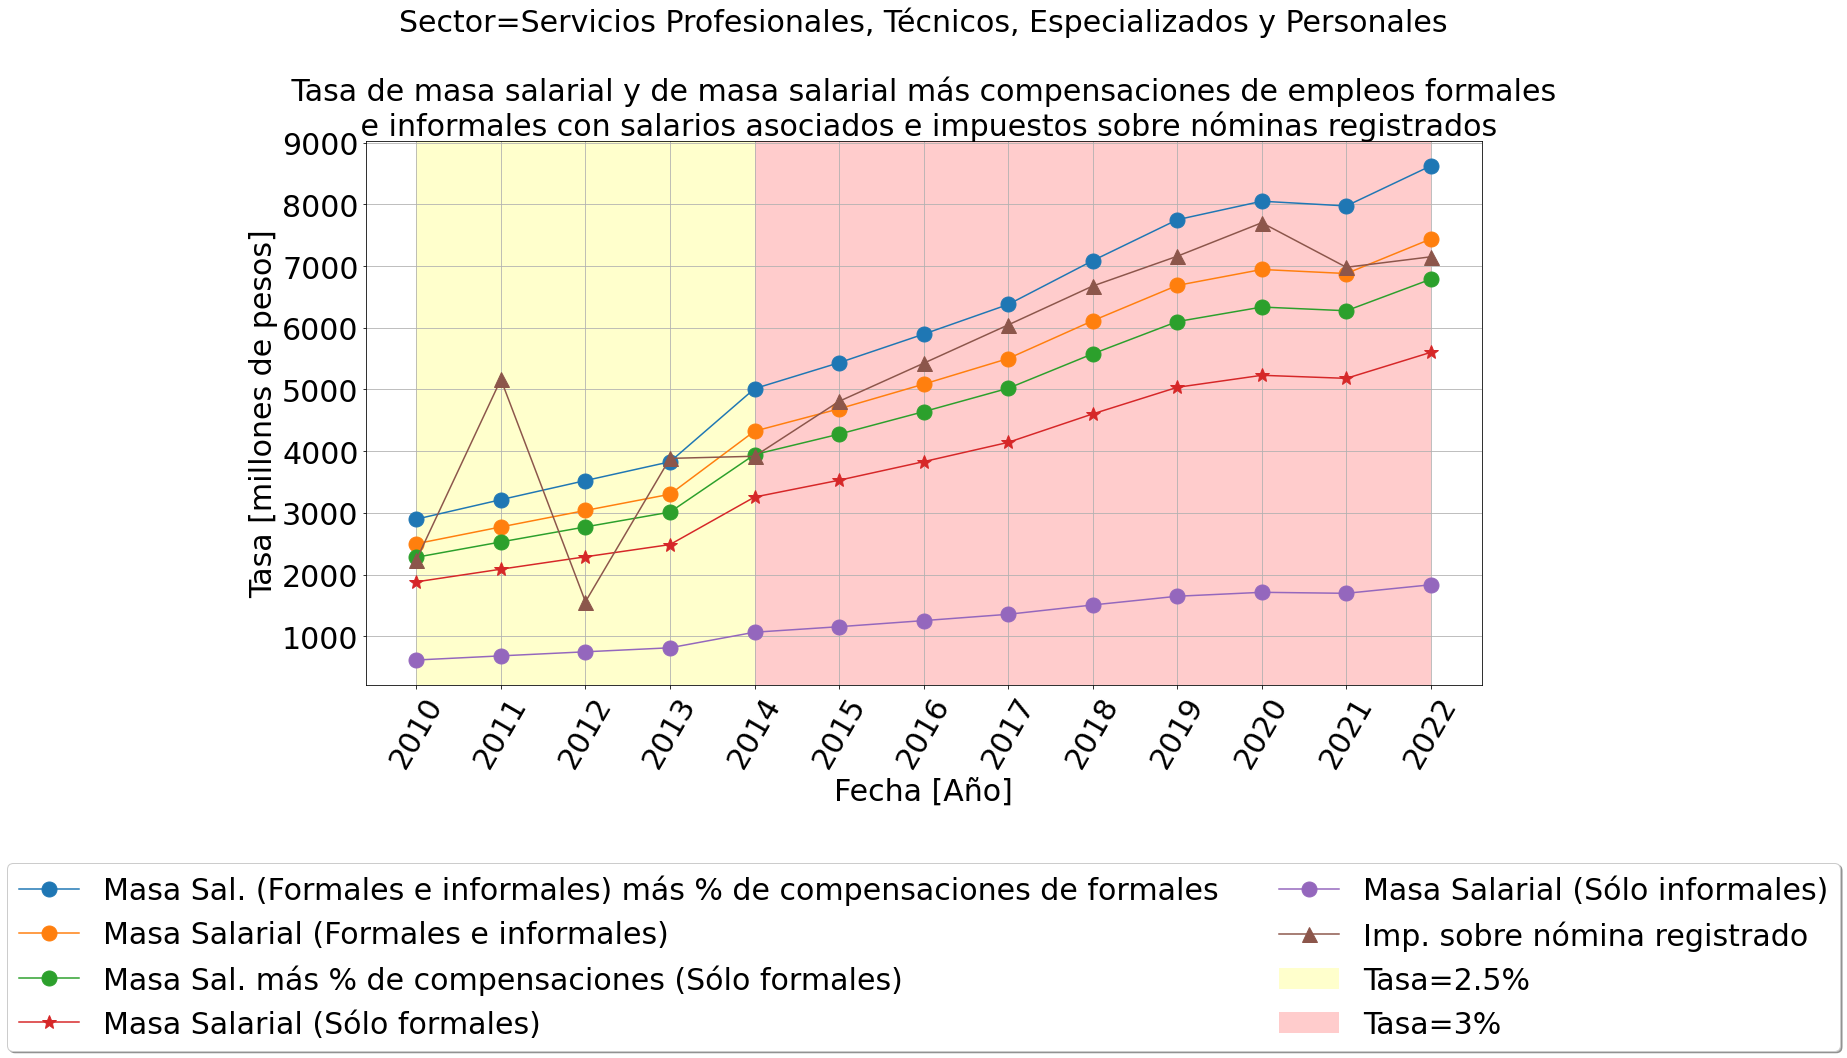

<bound method Figure.tight_layout of <Figure size 1440x720 with 1 Axes>>

In [13]:
ms='masa_sal_ta'

sec_t='4'

from crosswalks_scian_tesoreria import tesoreria_v15

tesoreria_v15['1_2']='Comercio al por Mayor y al por Menor'

markersize=15

fig, ax = plt.subplots(figsize=(20, 10))
# for ms in masa_sal_col:

    # Plot the data
ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_con_compensaciones'].values[:-1]+1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Sal. (Formales e informales) más % de compensaciones de formales')

ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual'].values[:-1]+1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Salarial (Formales e informales)')

ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_con_compensaciones'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Sal. más % de compensaciones (Sólo formales)')

ax.plot(1e-6*(1)*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual'].values[:-1],
        
        '*-',markersize=markersize,label='Masa Salarial (Sólo formales)')

ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Salarial (Sólo informales)')
    
# ax.plot(ingresos[ingresos['Status']=='Estimado'][ingresos['Año']>=2010]['Sobre  nóminas'].values,'o-',label='Imp. sobre nómina estimado')

ax.plot(df_impuestos_por_sector['impuesto_'+str(sec_t)] ,'^-',markersize=markersize,label='Imp. sobre nómina registrado')

    # ax.yaxis.set_label('ta')
font_size=30
# Get the text object
text = ax.yaxis.get_offset_text()

plt.ylabel('Tasa [millones de pesos]',size=font_size,color='k')
plt.xlabel('Fecha [Año]',size=font_size,color='k')
plt.title('Sector='+tesoreria_v15[int(sec_t)]+'\n\n Tasa de masa salarial y de masa salarial más compensaciones de empleos formales \n e informales con salarios asociados e impuestos sobre nóminas registrados',size=font_size,color='k')
plt.xticks(range(0,len(df_masa_sal_anual['Año'].values)-1),list(df_masa_sal_anual['Año'].values[:-1]),rotation=60,color='k',
           size=30 )
plt.yticks(color='k',size=font_size)

# ax.legend(prop={'size': 30})
# ax.grid(True) 

ax.axvspan(0, 4, facecolor='yellow', alpha=0.2,label='Tasa=2.5%')
ax.axvspan(4, len(df_masa_sal_anual['Año'].values)-2, facecolor='red', alpha=0.2,label='Tasa=3%')

# ax.legend(prop={'size': 30})

ax.legend(prop={'size': 30},loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2)
ax.grid(True) 
# Set the size.
text.set_size(30) # Overkill!

plt.show()

fig.tight_layout
# fig.savefig('Gráficos/Masa_sal_total_anual.png', dpi='figure', format='png')

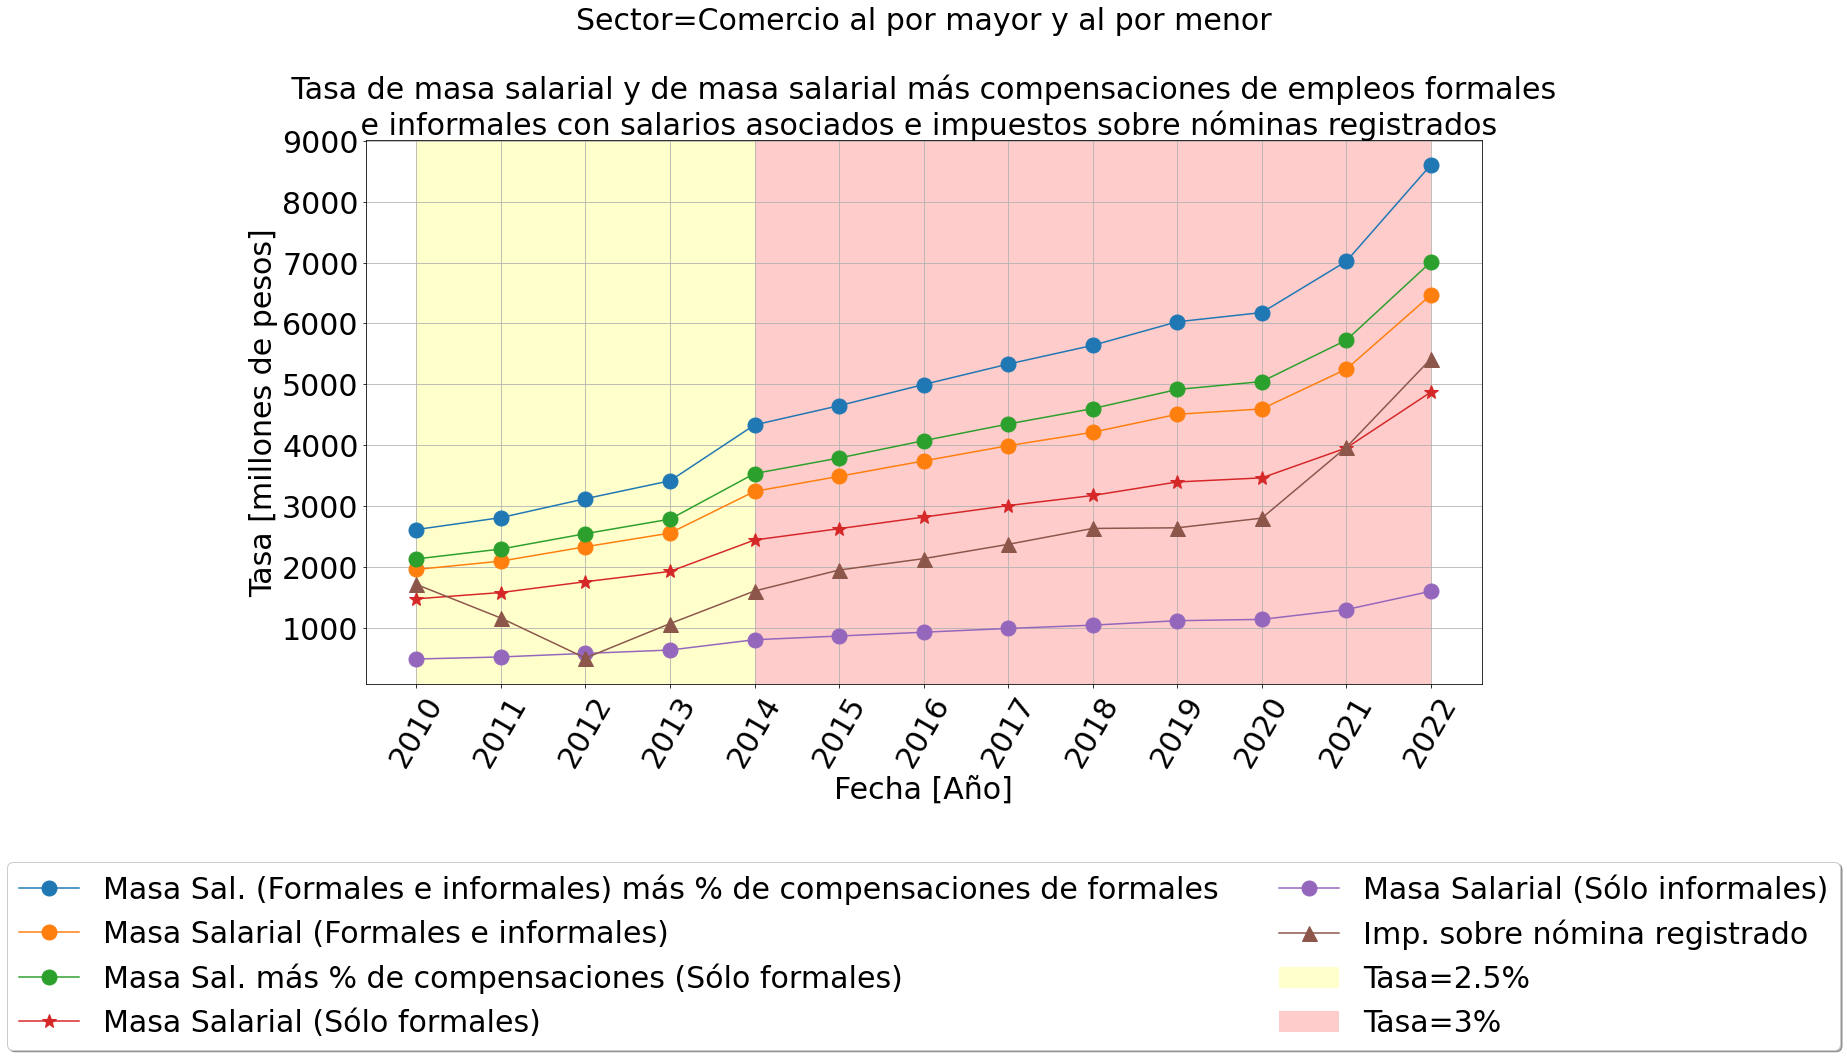

<bound method Figure.tight_layout of <Figure size 1440x720 with 1 Axes>>

In [14]:
ms='masa_sal_ta'

sec_t='1_2'

from crosswalks_scian_tesoreria import tesoreria_v15

tesoreria_v15['1_2']='Comercio al por mayor y al por menor'

markersize=15

fig, ax = plt.subplots(figsize=(20, 10))
# for ms in masa_sal_col:

    # Plot the data
ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_con_compensaciones'].values[:-1]+1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Sal. (Formales e informales) más % de compensaciones de formales')

ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual'].values[:-1]+1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Salarial (Formales e informales)')

ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_con_compensaciones'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Sal. más % de compensaciones (Sólo formales)')

ax.plot(1e-6*(1)*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual'].values[:-1],
        
        '*-',markersize=markersize,label='Masa Salarial (Sólo formales)')

ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Salarial (Sólo informales)')
    
# ax.plot(ingresos[ingresos['Status']=='Estimado'][ingresos['Año']>=2010]['Sobre  nóminas'].values,'o-',label='Imp. sobre nómina estimado')

ax.plot(df_impuestos_por_sector['impuesto_1']+df_impuestos_por_sector['impuesto_2'] ,'^-',markersize=markersize,label='Imp. sobre nómina registrado')

    # ax.yaxis.set_label('ta')
font_size=30
# Get the text object
text = ax.yaxis.get_offset_text()

plt.ylabel('Tasa [millones de pesos]',size=font_size,color='k')
plt.xlabel('Fecha [Año]',size=font_size,color='k')
plt.title('Sector='+tesoreria_v15[sec_t]+'\n\n Tasa de masa salarial y de masa salarial más compensaciones de empleos formales \n e informales con salarios asociados e impuestos sobre nóminas registrados',size=font_size,color='k')
plt.xticks(range(0,len(df_masa_sal_anual['Año'].values)-1),list(df_masa_sal_anual['Año'].values[:-1]),rotation=60,color='k',
           size=30 )
plt.yticks(color='k',size=font_size)

# ax.legend(prop={'size': 30})
# ax.grid(True) 

ax.axvspan(0, 4, facecolor='yellow', alpha=0.2,label='Tasa=2.5%')
ax.axvspan(4, len(df_masa_sal_anual['Año'].values)-2, facecolor='red', alpha=0.2,label='Tasa=3%')

# ax.legend(prop={'size': 30})

ax.legend(prop={'size': 30},loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2)
ax.grid(True) 
# Set the size.
text.set_size(30) # Overkill!

plt.show()

fig.tight_layout
# fig.savefig('Gráficos/Masa_sal_total_anual.png', dpi='figure', format='png')

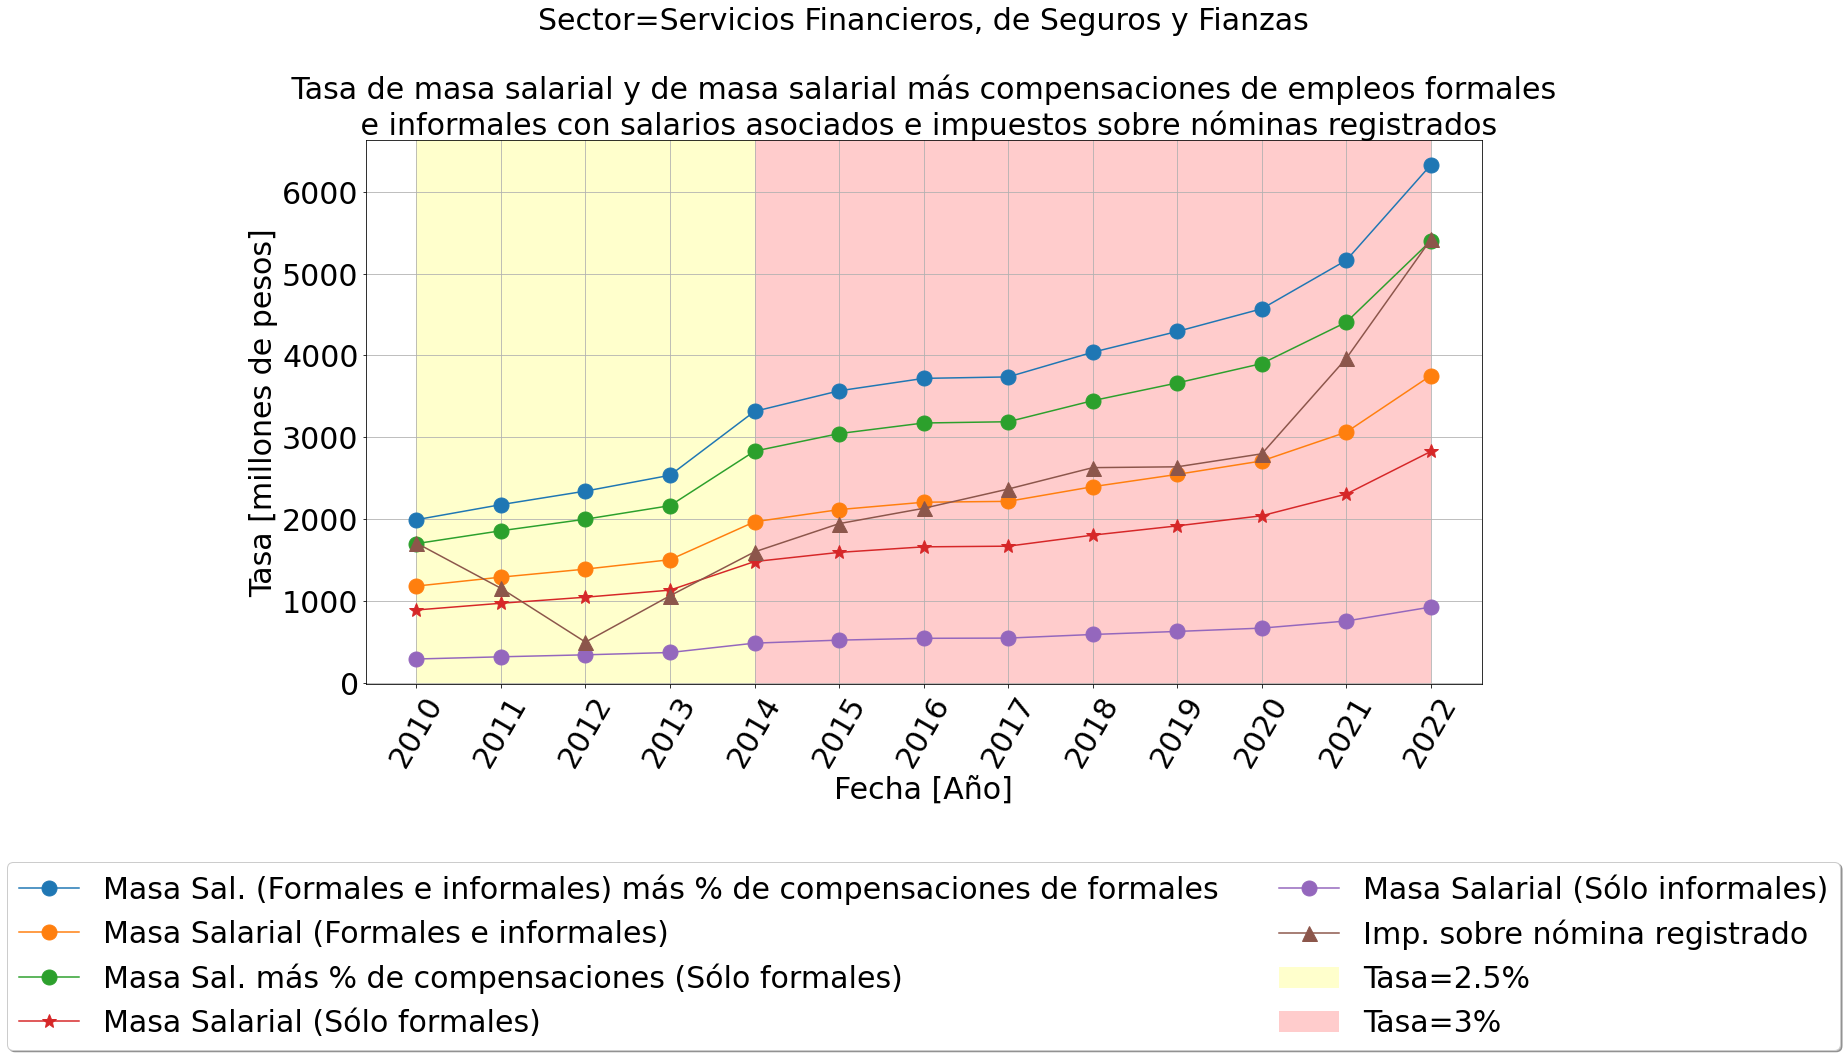

<bound method Figure.tight_layout of <Figure size 1440x720 with 1 Axes>>

In [18]:
ms='masa_sal_ta'

sec_t='7'

from crosswalks_scian_tesoreria import tesoreria_v15

tesoreria_v15['1_2']='Comercio al por mayor y al por menor'

markersize=15

fig, ax = plt.subplots(figsize=(20, 10))
# for ms in masa_sal_col:

    # Plot the data
ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_con_compensaciones'].values[:-1]+1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Sal. (Formales e informales) más % de compensaciones de formales')

ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual'].values[:-1]+1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Salarial (Formales e informales)')

ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_con_compensaciones'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Sal. más % de compensaciones (Sólo formales)')

ax.plot(1e-6*(1)*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual'].values[:-1],
        
        '*-',markersize=markersize,label='Masa Salarial (Sólo formales)')

ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Salarial (Sólo informales)')
    
# ax.plot(ingresos[ingresos['Status']=='Estimado'][ingresos['Año']>=2010]['Sobre  nóminas'].values,'o-',label='Imp. sobre nómina estimado')

ax.plot(df_impuestos_por_sector['impuesto_1']+df_impuestos_por_sector['impuesto_2'] ,'^-',markersize=markersize,label='Imp. sobre nómina registrado')

    # ax.yaxis.set_label('ta')
font_size=30
# Get the text object
text = ax.yaxis.get_offset_text()

plt.ylabel('Tasa [millones de pesos]',size=font_size,color='k')
plt.xlabel('Fecha [Año]',size=font_size,color='k')
plt.title('Sector='+tesoreria_v15[int(sec_t)]+'\n\n Tasa de masa salarial y de masa salarial más compensaciones de empleos formales \n e informales con salarios asociados e impuestos sobre nóminas registrados',size=font_size,color='k')
plt.xticks(range(0,len(df_masa_sal_anual['Año'].values)-1),list(df_masa_sal_anual['Año'].values[:-1]),rotation=60,color='k',
           size=30 )
plt.yticks(color='k',size=font_size)

# ax.legend(prop={'size': 30})
# ax.grid(True) 

ax.axvspan(0, 4, facecolor='yellow', alpha=0.2,label='Tasa=2.5%')
ax.axvspan(4, len(df_masa_sal_anual['Año'].values)-2, facecolor='red', alpha=0.2,label='Tasa=3%')

# ax.legend(prop={'size': 30})

ax.legend(prop={'size': 30},loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2)
ax.grid(True) 
# Set the size.
text.set_size(30) # Overkill!

plt.show()

fig.tight_layout
# fig.savefig('Gráficos/Masa_sal_total_anual.png', dpi='figure', format='png')

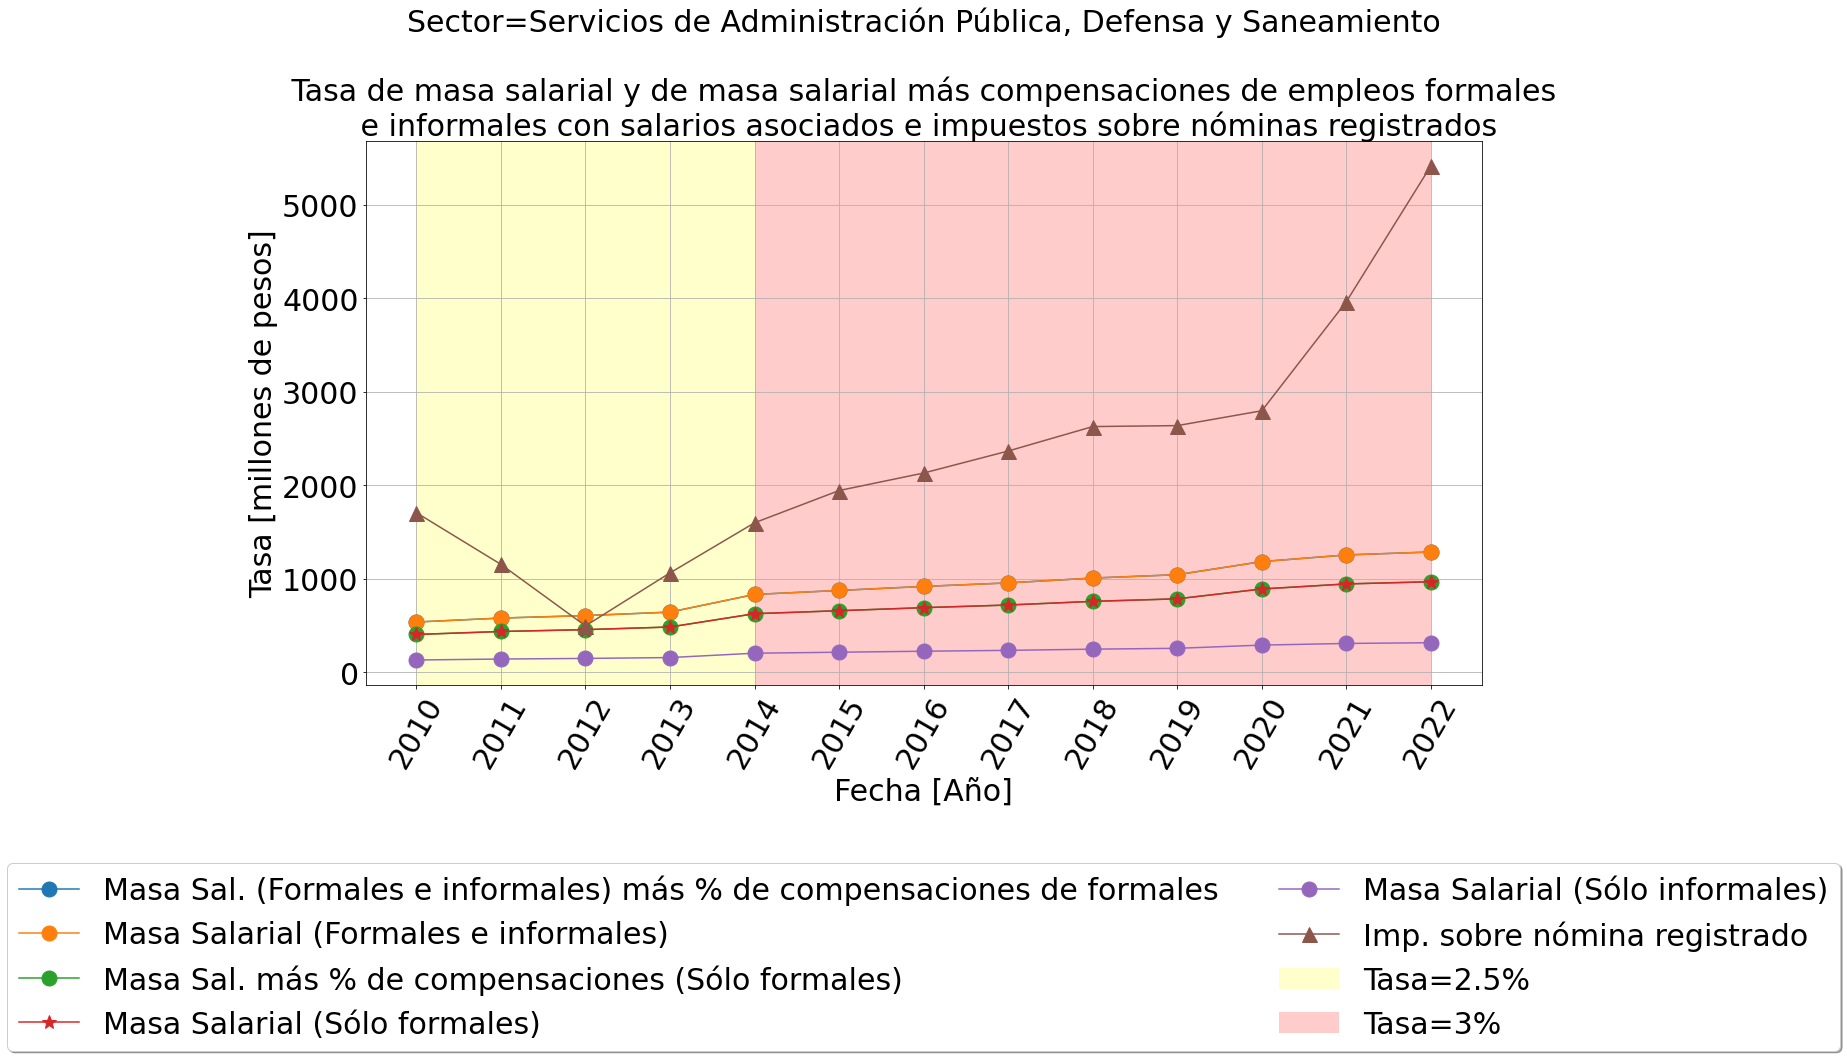

<bound method Figure.tight_layout of <Figure size 1440x720 with 1 Axes>>

In [19]:
ms='masa_sal_ta'

sec_t='11'

from crosswalks_scian_tesoreria import tesoreria_v15

tesoreria_v15['1_2']='Comercio al por mayor y al por menor'

markersize=15

fig, ax = plt.subplots(figsize=(20, 10))
# for ms in masa_sal_col:

    # Plot the data
ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_con_compensaciones'].values[:-1]+1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Sal. (Formales e informales) más % de compensaciones de formales')

ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual'].values[:-1]+1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Salarial (Formales e informales)')

ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_con_compensaciones'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Sal. más % de compensaciones (Sólo formales)')

ax.plot(1e-6*(1)*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual'].values[:-1],
        
        '*-',markersize=markersize,label='Masa Salarial (Sólo formales)')

ax.plot(1e-6*df_masa_sal_anual['masa_sal_ta_tesoreria_'+str(sec_t)+'_tasa_anual_frac_informales'].values[:-1],
        
        'o-',markersize=markersize,label='Masa Salarial (Sólo informales)')
    
# ax.plot(ingresos[ingresos['Status']=='Estimado'][ingresos['Año']>=2010]['Sobre  nóminas'].values,'o-',label='Imp. sobre nómina estimado')

ax.plot(df_impuestos_por_sector['impuesto_1']+df_impuestos_por_sector['impuesto_2'] ,'^-',markersize=markersize,label='Imp. sobre nómina registrado')

    # ax.yaxis.set_label('ta')
font_size=30
# Get the text object
text = ax.yaxis.get_offset_text()

plt.ylabel('Tasa [millones de pesos]',size=font_size,color='k')
plt.xlabel('Fecha [Año]',size=font_size,color='k')
plt.title('Sector='+tesoreria_v15[int(sec_t)]+'\n\n Tasa de masa salarial y de masa salarial más compensaciones de empleos formales \n e informales con salarios asociados e impuestos sobre nóminas registrados',size=font_size,color='k')
plt.xticks(range(0,len(df_masa_sal_anual['Año'].values)-1),list(df_masa_sal_anual['Año'].values[:-1]),rotation=60,color='k',
           size=30 )
plt.yticks(color='k',size=font_size)

# ax.legend(prop={'size': 30})
# ax.grid(True) 

ax.axvspan(0, 4, facecolor='yellow', alpha=0.2,label='Tasa=2.5%')
ax.axvspan(4, len(df_masa_sal_anual['Año'].values)-2, facecolor='red', alpha=0.2,label='Tasa=3%')

# ax.legend(prop={'size': 30})

ax.legend(prop={'size': 30},loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2)
ax.grid(True) 
# Set the size.
text.set_size(30) # Overkill!

plt.show()

fig.tight_layout
# fig.savefig('Gráficos/Masa_sal_total_anual.png', dpi='figure', format='png')